# Support Vector Regression

### Definition

**Support Vector Regression (SVR)** is a type of Support Vector Machine (SVM) used for regression tasks. It fits the best line within a threshold value, seeking to minimize the error within a margin while maximizing the margin between the support vectors and the decision boundary.

- **Regression**: SVR is used to predict continuous outcomes (e.g., temperature, prices of houses, age).
- **Classification**: Standard SVM is used for classification tasks.

### Formula:

The general formula for SVR is not as straightforward as linear regression. SVR aims to find a function $ f(x) $ that has at most $ \epsilon $ deviation from the actual obtained targets $ y_i $ for all the training data, and at the same time, is as flat as possible.

SVR solves:

$ \min_{w, b, \zeta, \zeta^*} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*) $

Where:
- $ w $ is the weight vector.
- $ b $ is the bias.
- $ \langle w, x_i \rangle $ represents the dot product between $ w $ and $ x_i $.
- $ \zeta $ and $ \zeta^* $ are slack variables measuring the degree of misfit.
- $ C $ is the regularization parameter.
- $ \epsilon $ is the margin of tolerance where no penalty is given to errors.

### Example

Suppose you want to predict the price of a house based on various features like size, number of rooms, location, etc. SVR can model this non-linear relationship by mapping the features into a higher-dimensional space and finding the hyperplane that best fits the data.

### Calculation

SVR involves solving a convex optimization problem, which can be efficiently solved using quadratic programming. The solution involves finding the Lagrange multipliers that satisfy the Karush-Kuhn-Tucker (KKT) conditions for the optimization problem.

1. **Kernel Trick**: SVR often utilizes the "kernel trick" to transform data into a higher-dimensional space where a hyperplane can be used to perform the regression.

2. **Support Vectors**: The data points that lie closest to the decision boundary, or the hyperplane, are the support vectors. They are critical in defining the position and orientation of the hyperplane.

3. **Regularization Parameter (C)**: The parameter $ C $ serves as a regularization term and controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights.

SVR's ability to handle non-linear relationships and provide robust predictions even in the presence of non-linearities and high-dimensional spaces makes it a powerful tool for regression tasks.

### Importing the dataset

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
dataset = pd.read_csv('./filez/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [181]:
print(X) ## 2D-array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [182]:
print(y) ## 1D-array

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [183]:
## reshape(rows, columns)
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

### Applying feature scaling

Why scale features **AND** target in SVR:
- **Uniform Error Margin**: SVR tries to make sure that errors (differences between what it predicts and the actual values) are within a certain range. If 'Salary' values are much larger than 'Level' values, the model might not correctly judge what counts as a small or large error -> If the target variable ('Salary') is on a very different scale than the features ('Level'), the epsilon value might not appropriately capture the margin of tolerance for errors.
- **Better Performance**: When everything is scaled, SVR can work more efficiently and make more accurate predictions. It's like giving the model a clearer, more balanced view of the data.

Why use **DIFFERENT** scalers for features & targets?
- **Different Distributions**: Typically, X and y have different means and standard deviations. Using the same scaler imposes the distribution characteristics of X onto y, which can distort the scaling of y.
- **Accuracy and Interpretation**: Proper scaling using separate scalers ensures that each variable is treated according to its own distribution, leading to more accurate models and more interpretable results.

In [184]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [185]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [186]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [187]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Training the SVR model on the whole dataset

In [188]:
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")  ## radial basis function kernel
y_ = y.reshape(-1) ## SVM expects a 1D array

regressor.fit(X, y_)


SVR()

### Predicting a new result

In [189]:
# get scaled value of 6.5 position
scaled_position = sc_X.transform([[6.5]])

# get scaled value of salary
scaled_salary = regressor.predict(scaled_position).reshape(-1,1)

# get salary by reversing the scale
salary = sc_y.inverse_transform(scaled_salary)

print(f'new prediction for position 6.5: ${salary[0][0]:,.2f}')


new prediction for position 6.5: $170,370.02


### Visualising the SVR results

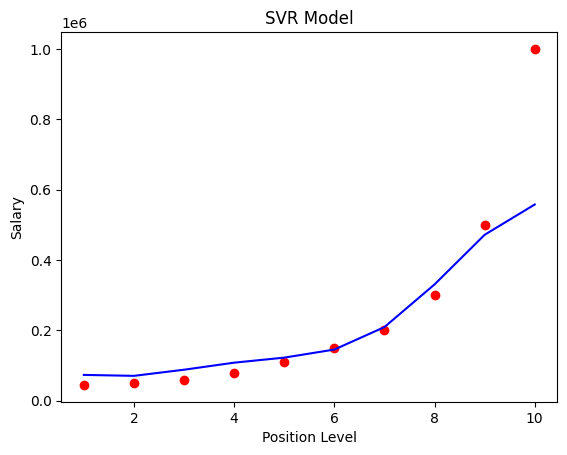

In [190]:
X_ = sc_X.inverse_transform(X)
y_ = sc_y.inverse_transform(y)
pred = sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1))

plt.scatter(X_, y_, color="red")
plt.plot(X_, pred, color="blue")
plt.title("SVR Model")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Visualising the SVR results (for higher resolution & smoother curve)

/var/folders/1d/ty_knwmj61b4d3qs091tfglm0000gn/T/ipykernel_11996/4192711397.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_), max(X_), 0.1)


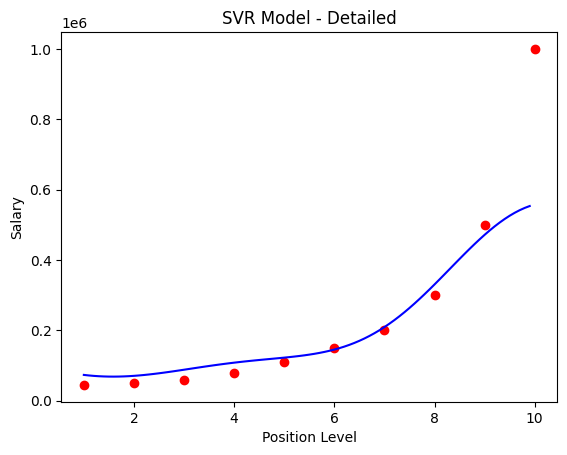

In [192]:
# increase the density of the X points with step = 0.1 -> (1.1, 1.2, 1.3....)
X_grid = np.arange(min(X_), max(X_), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
X_grid_ = sc_X.transform(X_grid)
pred = sc_y.inverse_transform(regressor.predict(X_grid_).reshape(-1, 1))
plt.scatter(X_, y_, color='red')
plt.plot(X_grid, pred, color = 'blue')
plt.title('SVR Model - Detailed')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

    Pretty nice, but... what about the last observation? 😅